In [1]:
#primer intento tuvo algunos bugs, me asuste en borrar este cell pq capaz le salia otro bug entonces lo deje ahi :)
import matplotlib

matplotlib.use('Agg') 

import matplotlib.pyplot as plt
import numpy as np

# ---1. definir parametros biologicos
R0_NATURAL = 4.0        
GENERACIONES_ANUALES = 3 
ANOS_SIMULACION = 5
NUM_GENERACIONES = ANOS_SIMULACION * GENERACIONES_ANUALES 
POBLACION_INICIAL = 100 

# ---2.parametros eficacia plaguicidas
Eficacia_A = 0.5    
Eficacia_B = 0.95   


# ---3.simulacion poblacion
def simular_poblacion(ro_escenario):
    """Simula el crecimiento de la población de la polilla a lo largo de las generaciones."""
    poblacion = [POBLACION_INICIAL]
    
    for _ in range(NUM_GENERACIONES):
        nueva_poblacion = poblacion[-1] * ro_escenario
        poblacion.append(nueva_poblacion)
        
    poblacion = np.clip(poblacion, 0, 5000) 
    
    return poblacion


# ---4. ploteo "estatico"
def plot_simulacion_estatica(ef_a, ef_b):
    
    #calculo bajo escenarios
    R0_Plaguicida_A = R0_NATURAL * (1 - ef_a)
    R0_Plaguicida_B = R0_NATURAL * (1 - ef_b)
    
    #ejecucion simulacion
    pob_control = simular_poblacion(R0_NATURAL)
    pob_plaguicida_A = simular_poblacion(R0_Plaguicida_A)
    pob_plaguicida_B = simular_poblacion(R0_Plaguicida_B)

    #eje x
    generaciones = [f'G{i+1}' for i in range(NUM_GENERACIONES + 1)]
    x = np.arange(len(generaciones))
    
    #plotear grafico
    # NOTA: plt.figure() es donde se produce el error sin las líneas de corrección.
    plt.figure(figsize=(12, 6))
    
    # 1.escenario sin plaguicida
    plt.plot(x, pob_control, 
             label=f'Control (R0={R0_NATURAL:.2f} - Sin Plaguicida)', 
             marker='o', linestyle='-', color='gray', alpha=0.6)
             
    # 2. escenario plagicida a
    plt.plot(x, pob_plaguicida_A, 
             label=f'Plaguicida A (Eficacia={ef_a*100:.0f}%, R0={R0_Plaguicida_A:.2f})', 
             marker='^', linestyle='--', color='orange')
             
    # 3.plagicida b
    plt.plot(x, pob_plaguicida_B, 
             label=f'Plaguicida B (Eficacia={ef_b*100:.0f}%, R0={R0_Plaguicida_B:.2f})', 
             marker='s', linestyle='-', color='darkgreen', linewidth=2)
    
    
    #4.configurar gráfico
    plt.title('Simulación de la Dinámica Poblacional de Lobesia botrana', fontsize=16)
    plt.xlabel(f'Generación (G1, G2, G3 anual) - {ANOS_SIMULACION} Años', fontsize=12)
    plt.ylabel('Población de Polillas (Índice)', fontsize=12)
    
    plt.xticks(x, generaciones, rotation=45, ha='right')
    
    # 5.extraer gráfico
    plt.axhline(POBLACION_INICIAL, color='r', linestyle=':', 
                label='Población Inicial / Umbral de reemplazo (R0=1.0)') 
                
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.savefig('plot_simulacion_estatica')
    plt.show()

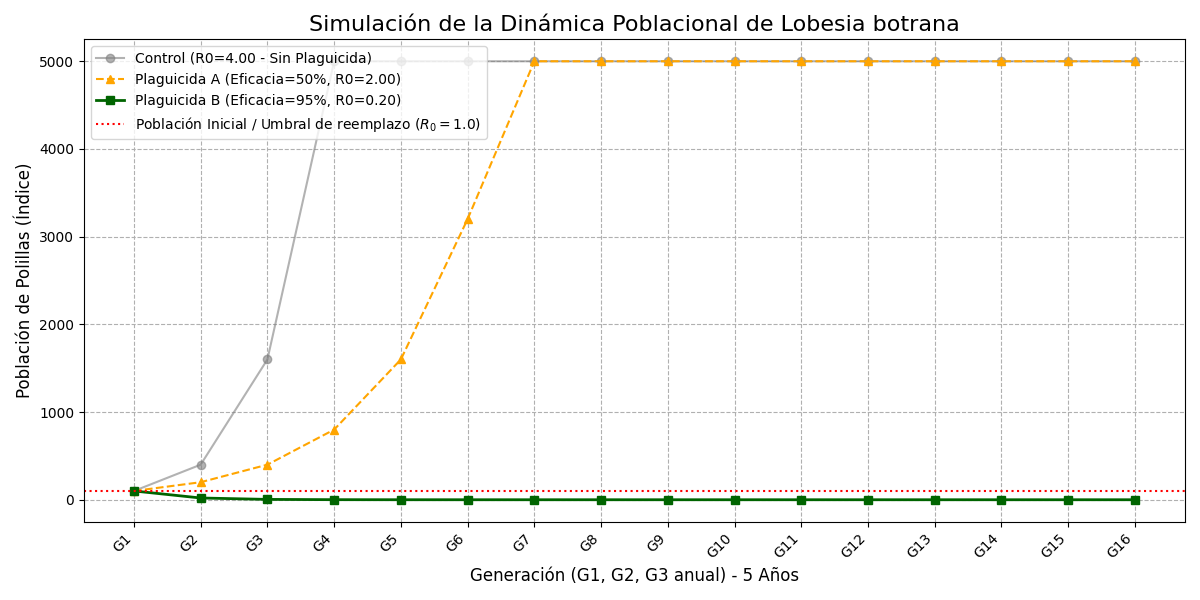

In [2]:
# ---0. configuracion matplotlib
import matplotlib
#forzar agg (bug anterior arreglado y consejos de frank andrade)
matplotlib.use('Agg') 
# ------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
import io
from IPython.display import display, Image

# ---1. definir parametro biologicos
R0_NATURAL = 4.0 #crecimiento natural
GENERACIONES_ANUALES = 3 
ANOS_SIMULACION = 5
NUM_GENERACIONES = ANOS_SIMULACION * GENERACIONES_ANUALES 
POBLACION_INICIAL = 100 

# ---2. parametros eficacia estatica
Eficacia_A = 0.5    
Eficacia_B = 0.95   


# ---3.funcion simulacion poblacion
def simular_poblacion(ro_escenario):
    """simula el crecimiento de la población de la polilla a lo largo de las generaciones."""
    poblacion = [POBLACION_INICIAL]
    
    for _ in range(NUM_GENERACIONES):
        nueva_poblacion = poblacion[-1] * ro_escenario
        poblacion.append(nueva_poblacion)
        
    poblacion = np.clip(poblacion, 0, 5000) 
    return poblacion


# ---4. ploteo y deplegue
def plot_simulacion_y_desplegar(ef_a, ef_b):
    
    # calculos "r0"
    R0_Plaguicida_A = R0_NATURAL * (1 - ef_a)
    R0_Plaguicida_B = R0_NATURAL * (1 - ef_b)
    
    # ejecutar simulacion
    pob_control = simular_poblacion(R0_NATURAL)
    pob_plaguicida_A = simular_poblacion(R0_Plaguicida_A)
    pob_plaguicida_B = simular_poblacion(R0_Plaguicida_B)

    # eje x
    generaciones = [f'G{i+1}' for i in range(NUM_GENERACIONES + 1)]
    x = np.arange(len(generaciones))
    
    #crear figura
    fig, ax = plt.subplots(figsize=(12, 6))
    
    #ploteo de datos
    ax.plot(x, pob_control, 
             label=f'Control (R0={R0_NATURAL:.2f} - Sin Plaguicida)', 
             marker='o', linestyle='-', color='gray', alpha=0.6)
             
    ax.plot(x, pob_plaguicida_A, 
             label=f'Plaguicida A (Eficacia={ef_a*100:.0f}%, R0={R0_Plaguicida_A:.2f})', 
             marker='^', linestyle='--', color='orange')
             
    ax.plot(x, pob_plaguicida_B, 
             label=f'Plaguicida B (Eficacia={ef_b*100:.0f}%, R0={R0_Plaguicida_B:.2f})', 
             marker='s', linestyle='-', color='darkgreen', linewidth=2)
    
    
    #ejes
    ax.set_title('Simulación de la Dinámica Poblacional de Lobesia botrana', fontsize=16)
    ax.set_xlabel(f'Generación (G1, G2, G3 anual) - {ANOS_SIMULACION} Años', fontsize=12)
    ax.set_ylabel('Población de Polillas (Índice)', fontsize=12)
    
    ax.set_xticks(x, generaciones, rotation=45, ha='right')
    ax.axhline(POBLACION_INICIAL, color='r', linestyle=':', 
                label='Población Inicial / Umbral de reemplazo ($R_0=1.0$)') 
                
    ax.legend(loc='upper left')
    ax.grid(True, linestyle='--')
    fig.tight_layout()
    
    # ---guardar en memoria y mostrar
    #guardar imagen en memoria
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    plt.close(fig) #cerrar figura

    #mostrar imagen
    display(Image(buf.getvalue()))

#mostrar funciones
plot_simulacion_y_desplegar(Eficacia_A, Eficacia_B)